In [1]:
from main import *

## Gun Modelv2 non sym

OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,100_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_5_POD_13_1e-6/Data/
Opening files from this path =  OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,100_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_5_POD_13_1e-6/Data/


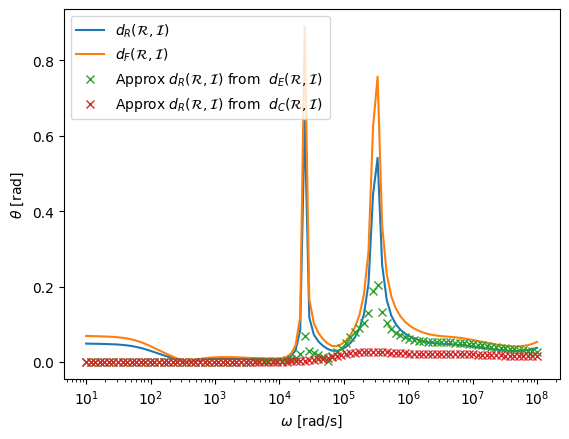

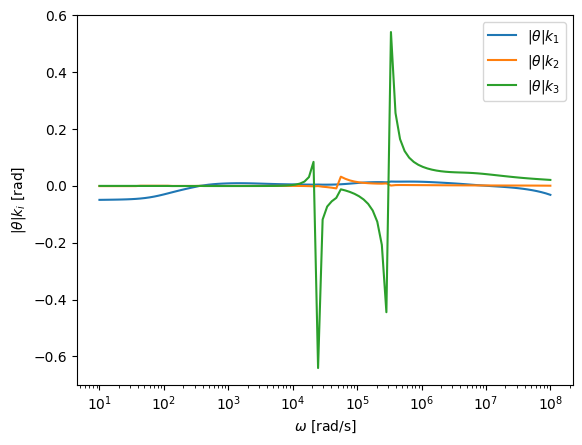

Computing F measure Tilde


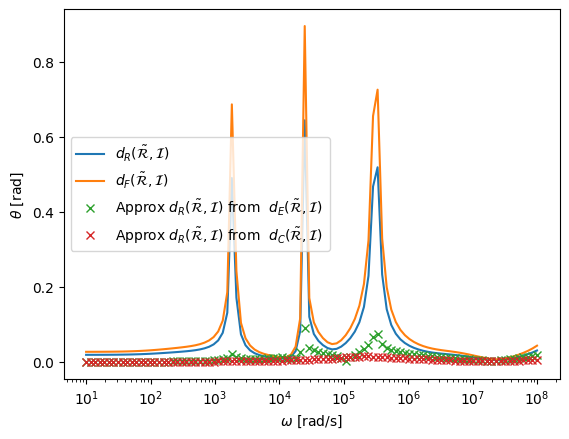

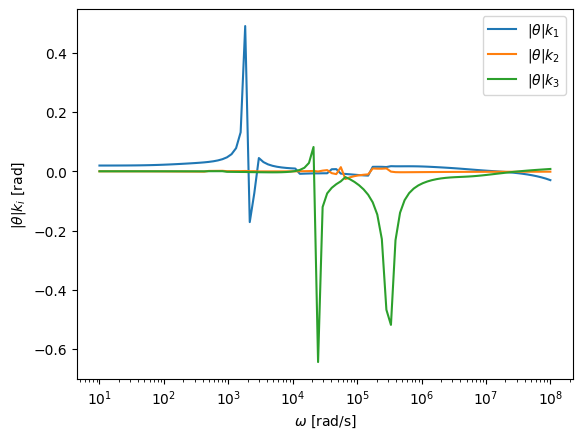

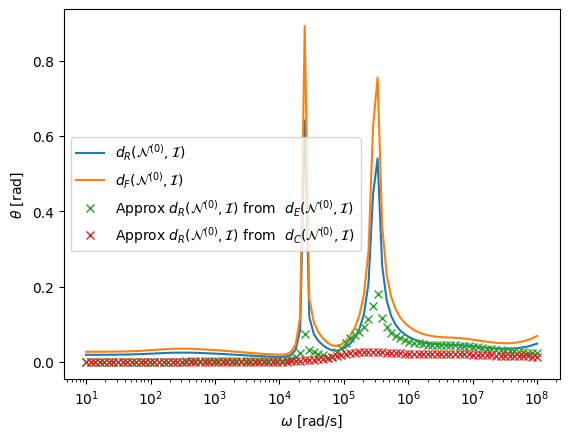

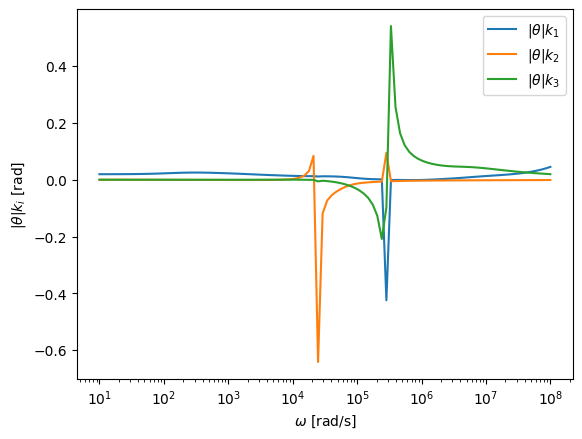

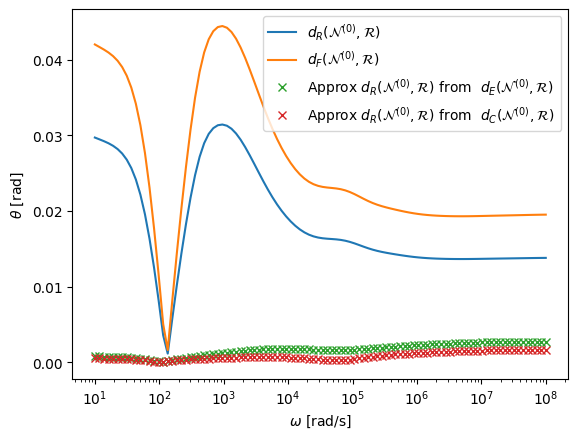

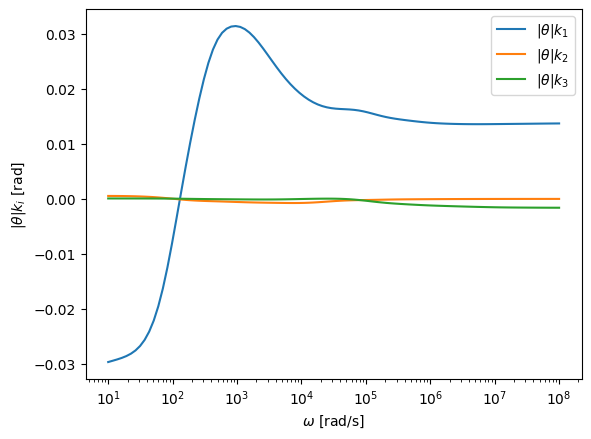

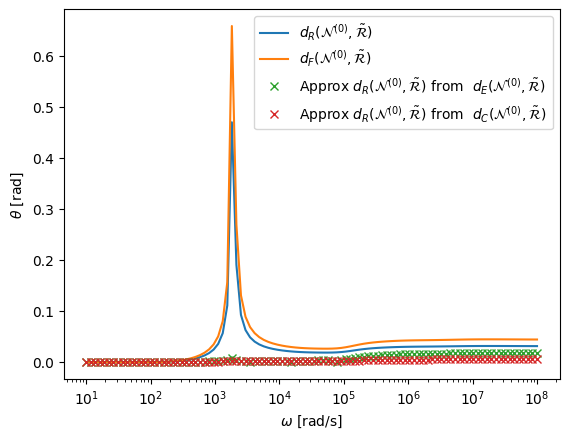

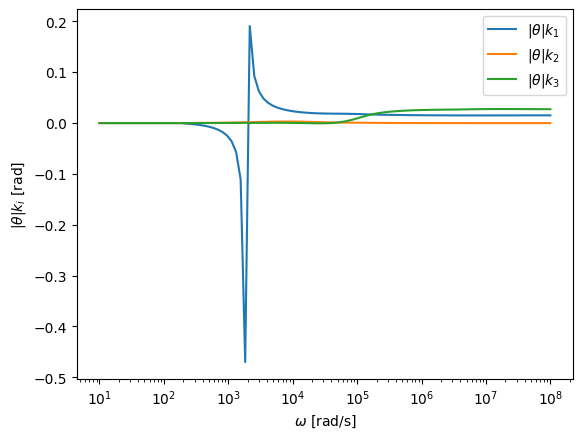

In [3]:

#DirList=["OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_4_POD_13_1e-6/Data/"]
#    "OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_4_POD_13_1e-6/Data/"]
#DirList=["OCC_Gun_modelv2_nonsym_al/al_0.01_mu_1,1_sig_3.5e7,3.5e7/1e1-1e8_40_el_26657_ord_2_POD_13_1e-6/Data/"]

#DirList=["OCC_Gun_modelv2_small/al_0.001_mu_1,100_sig_3.5e7,4.5e6/1e1-1e8_40_el_25735_ord_5_POD_13_1e-6/Data/"]

SaveRIList=[]
SaveRtilde=[]

MaxOmega=1e8
p=5
mu=100

#directory="OCC_Gun_modelv2_small/al_0.001_mu_1,100_sig_3.5e7,4.5e6/1e1-1e8_40_el_25735_ord_5_POD_13_1e-6/Data/"

directory="OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,"+str(mu)+"_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_"+str(p)+"_POD_13_1e-6/Data/"
#directory="OCC_Gun_modelv2_nonsym_StainSt_ep_1e-10_tol_1e-12/al_0.01_mu_1,"+str(mu)+"_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_"+str(p)+"_POD_13_1e-6/Data/"
#directory="OCC_Gun_modelv2_nonsym_StainSt_Blboth/al_0.01_mu_1,"+str(mu)+"_sig_1.45e6,4.5e6/1e1-1e8_100_el_28463_ord_"+str(p)+"_POD_13_1e-6/Data/"


print(directory)
#RIResultsFull,RtildeIResultsFull, N0IResultsFull, N0RResultsFull, N0RtildeResultsFull=main(directory,MaxOmega,Figures="On",FullRom="Full")    
RIResults,RtildeIResults, N0IResults, N0RResults, N0RtildeResults=main(directory,MaxOmega,Figures="On",FullRom="Rom")    

SaveRIList=[]
SaveRtilde=[]



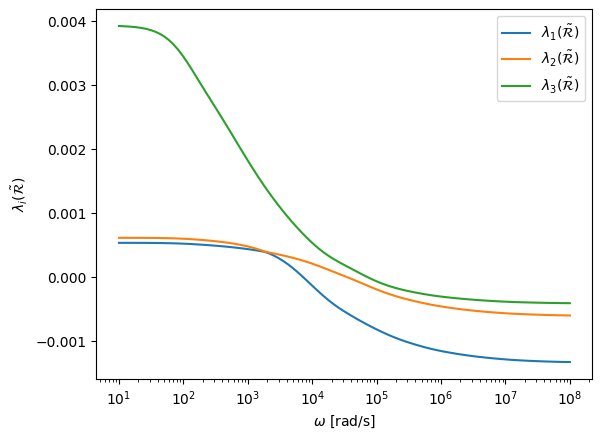

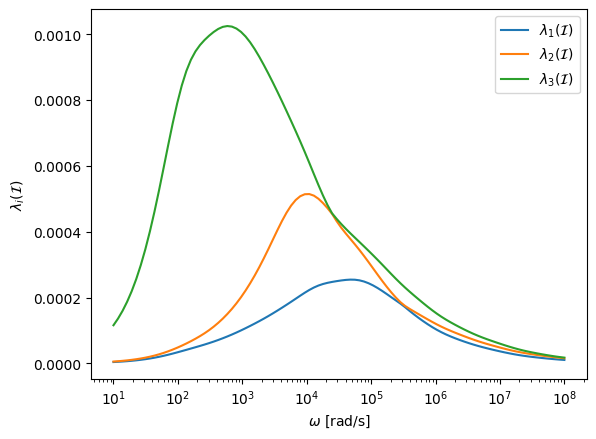

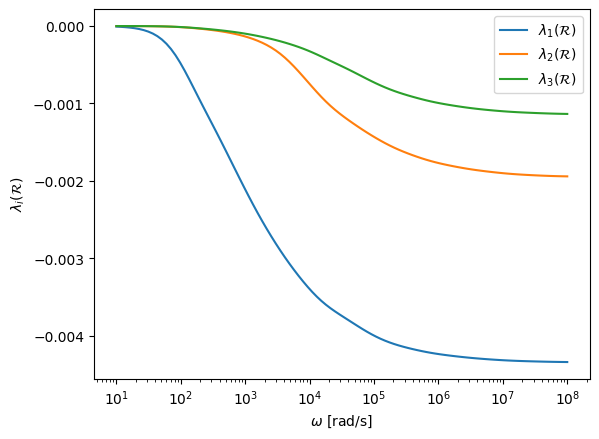

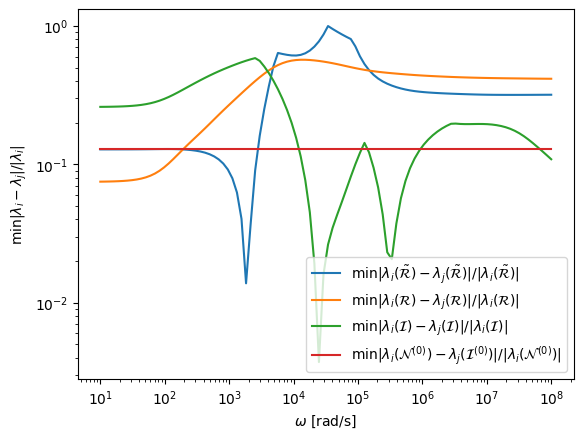

In [48]:
Frequencies=RIResults["Frequencies"]
URstore=RIResults["URstore"]
URtildestore=RIResults["URtildestore"]
UIstore=RIResults["UIstore"]
UN0store=RIResults["UN0store"]

N = len(Frequencies)
for n in range(N):
    u = URstore[n,:]
    ind=np.argsort((u))
    URstore[n,:]=u[ind]
    utilde = URtildestore[n,:]
    ind=np.argsort((utilde))
    URtildestore[n,:]=utilde[ind]
    ui = UIstore[n,:]
    ind=np.argsort((ui))
    UIstore[n,:]=ui[ind]
    
              
Labels=[r"$\lambda_1(\tilde{\cal R})$",r"$\lambda_2(\tilde{\cal R})$",r"$\lambda_3(\tilde{\cal R})$"]
plt.figure()
for n in range(3):
    plt.semilogx(Frequencies,URtildestore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i(\tilde{\cal R})$")
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_eig_Rtilde_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

plt.figure()
Labels=[r"$\lambda_1({\cal I})$",r"$\lambda_2({\cal I})$",r"$\lambda_3({\cal I})$"]
for n in range(3):
    plt.semilogx(Frequencies,UIstore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i({\cal I})$")
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_eig_I_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

plt.figure()
Labels=[r"$\lambda_1({\cal R})$",r"$\lambda_2({\cal R})$",r"$\lambda_3({\cal R})$"]
for n in range(3):
    plt.semilogx(Frequencies,URstore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i({\cal R})$")
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_eig_R_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()


relmindiffRtilde = np.zeros(len(Frequencies))
relmindiffI = np.zeros(len(Frequencies))
relmindiffR = np.zeros(len(Frequencies))
relmindiffN0 = np.zeros(len(Frequencies))


for n in range(len(Frequencies)):
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,m]) < d:
                d=abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,m])
            if abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,k]) < d:
                d=abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,k])
                
    relmindiffRtilde[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,m]) < d:
                d=abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,m]) 
            if abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,k]) < d:
                d=abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,k]) 
    relmindiffI[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,m]) < d:
                d=abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,m])
            if abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,k]) < d:
                d=abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,k])
                
    relmindiffR[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,m]) < d:
                d=abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,m]) 
            if abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,k]) < d:
                d=abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,k]) 
    relmindiffN0[n]=d
     

    
plt.figure()
plt.loglog(Frequencies,relmindiffRtilde,label=r"$\min |\lambda_i(\tilde{\cal R})-\lambda_j(\tilde{\cal R})|/|\lambda_i(\tilde{\cal R})|$")
plt.loglog(Frequencies,relmindiffR,label=r"$\min |\lambda_i({\cal R})-\lambda_j({\cal R})|/|\lambda_i({\cal R})|$")
plt.loglog(Frequencies,relmindiffI,label=r"$\min |\lambda_i({\cal I})-\lambda_j({\cal I})|/|\lambda_i({\cal I})|$")
plt.loglog(Frequencies,relmindiffN0,label=r"$\min |\lambda_i({\cal N}^{(0)})-\lambda_j({\cal I}^{(0)})|/|\lambda_i({\cal N}^{(0)})|$")
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\min |\lambda_i-\lambda_j|/|\lambda_i|$")
plt.legend()

plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_eig_prox_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

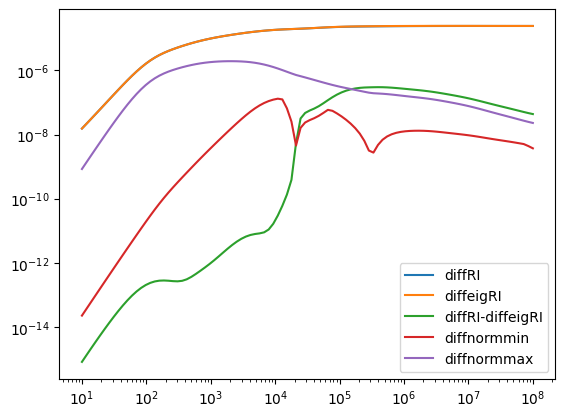

In [13]:
Perm = np.array([[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]])

Frequencies=RIResults["Frequencies"]
URstore=RIResults["URstore"]
URtildestore=RIResults["URtildestore"]
UIstore=RIResults["UIstore"]
UN0store=RIResults["UN0store"]

Rstore=RIResults["Rstore"]
Rtildestore=RIResults["Rtildestore"]
Istore=RIResults["Istore"]
N0store=RIResults["N0store"]


N=len(Frequencies)
diffRI=np.zeros(N)
diffeigRI=np.zeros(N)
diffnormmin=np.zeros(N)
diffnormmax=np.zeros(N)
uR=np.zeros(3)
uI=np.zeros(3)
R=np.zeros((3,3))
I=np.zeros((3,3))
Rtilde=np.zeros((3,3))
N0=np.zeros((3,3))

sorteigenvalues="MaxDifference"
for n in range(N):
    for i in range(3):
        uR[i]=URstore[n,i]
        uI[i]=UIstore[n,i]

        for j in range(3):
            R[i,j]=Rstore[n,i,j]
            I[i,j]=Istore[n,i,j]
            Rtilde[i,j]=Rtildestore[n,i,j]
            N0[i,j]=N0store[n,i,j]
        
            
    if sorteigenvalues=="MinDifference":
            # Find min combination

        diffeig=1e10

    elif sorteigenvalues=="MaxDifference":
            # Find max combination
        diffeig=0.

    for m in range(6):
        mysum=0.
        ind=Perm[m,:]
        for i in range(3):
            mysum = mysum+ (uR[i]-uI[ind[i]-1])**2
        check = False
        if sorteigenvalues=="MinDifference" and mysum < diffeig:
            check = True
        elif sorteigenvalues=="MaxDifference" and mysum > diffeig:
            check = True
        if check==True:
            diffeig = mysum
            puI=np.zeros(3,dtype=np.longdouble)
        #         #S=np.zeros((3,3))
            for i in range(3):
                puI[i]=uI[ind[i]-1]
       
    

    evlist=np.zeros(3)    
    evlist[0]= - (puI[1]-puI[2])*(uR[1]-uR[2])
    evlist[1]= - (puI[0]-puI[2])*(uR[0]-uR[2])
    evlist[2]= - (puI[0]-puI[1])*(uR[0]-uR[1])
    normalisation_min = np.min(np.abs(evlist))
    normalisation_max = np.max(np.abs(evlist))

    Tol=1e-6
    diffRI[n]=np.linalg.norm(R-I,ord='fro')**2
    diffeigRI[n]=diffeig
    diffnormmin[n]=normalisation_min
    diffnormmax[n]=normalisation_max

plt.figure()
plt.loglog(Frequencies,diffRI,label='diffRI')
plt.loglog(Frequencies,diffeigRI,label='diffeigRI')

plt.loglog(Frequencies,np.abs(diffeigRI-diffRI),label='diffRI-diffeigRI')

plt.loglog(Frequencies,diffnormmin,label='diffnormmin')
plt.loglog(Frequencies,diffnormmax,label='diffnormmax')
plt.legend()

#print(np.abs(diffeigRI-diffRI),diffeigRI,diffRI)


dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max', 'RIfmeasapprx_den_const_max', 'RIfmeasapprx_den_const_min', 'RIcommeapprx_den_const_max', 'RIcommeapprx_den_const_min', 'URstore', 'UIstore', 'URtildestore', 'UN0store', 'QRstore', 'QIstore', 'QRtildestore', 'QN0store', 'AnglestoreRIfmeasfullconstsortedmindiff', 'AnglestoreRIfmeasfullconstsortedmaxdiff', 'AnglestoreRIcommeasfullconstsortedmindiff', 'AnglestoreRIcommeasfullconstsortedmaxdiff', 'Rstore', 'Istore', 'Rtildestore', 'N0store'])


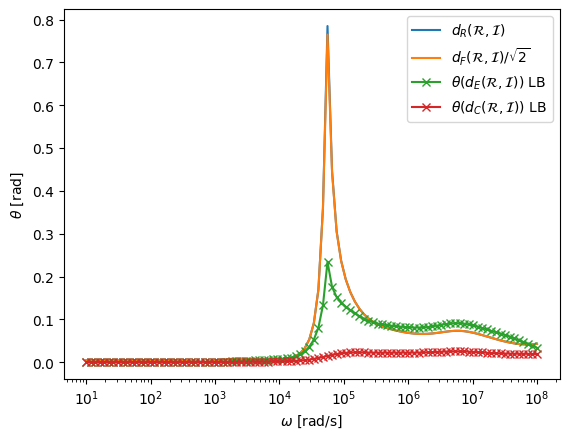

In [38]:
print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"],
                                                     RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIfmeasapprxconstsortedmax=np.fmax(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"])

#AnglestoreRIfmeasapprxconstsortedminFull=np.fmin(RIResultsFull["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"],
#                                                     RIResultsFull["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
#AnglestoreRIfmeasapprxconstsortedmaxFull=np.fmax(RIResultsFull["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResultsFull["AnglestoreRIfmeasapprxconstsortedmindiff_max"])


AnglestoreRIcommeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmax=np.fmax(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

#AnglestoreRIcommeasapprxconstsortedminFull=np.fmin(RIResultsFull["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"],RIResultsFull["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

#FrequenciesFull=RIResultsFull["Frequencies"]



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmin,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB')
#plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmindiff_min,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ UB')

plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmin,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB')
#plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmindiff_min,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ UB')
#plt.semilogx(FrequenciesFull,AnglestoreRIfmeasapprxconstsortedminFull,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB Full')
#plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmindiff_min,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ UB')

#plt.semilogx(FrequenciesFull,AnglestoreRIcommeasapprxconstsortedminFull,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB Full')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RI_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

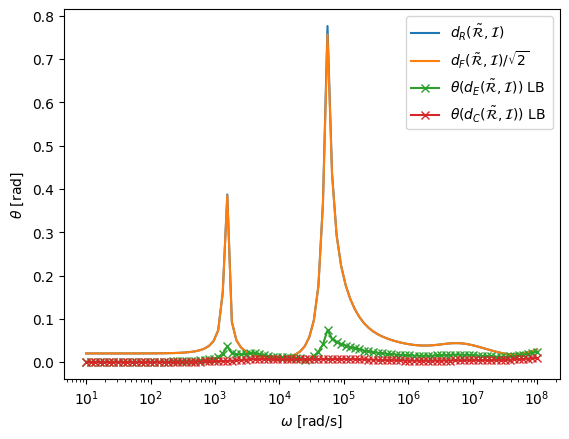

In [39]:

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmin=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIfmeasapprxconstsortedmax=np.fmax(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"])

AnglestoreRtildeIcommeasapprxconstsortedmin=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"])
AnglestoreRtildeIcommeasapprxconstsortedmax=np.fmax(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmin,'-x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB')

plt.semilogx(Frequencies,AnglestoreRtildeIcommeasapprxconstsortedmin,'-x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RtildeI_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

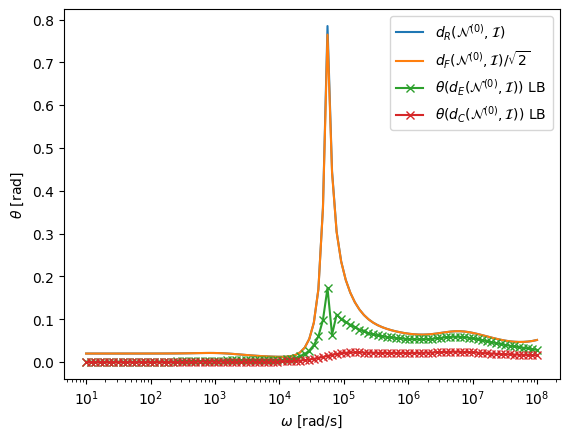

In [40]:

Frequencies=N0IResults["Frequencies"]
MinAnglestoreN0I=N0IResults["MinAnglestoreN0I"]
AnglestoreN0Ifmeasapprxconstsortedmin=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_min"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Ifmeasapprxconstsortedmax=np.fmax(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_max"])

AnglestoreN0Icommeasapprxconstsortedmin=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_min"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommeasapprxconstsortedmax=np.fmax(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_max"])


dFMinAnglestoreN0I = N0IResults["dFMinAnglestoreN0I"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0I,label=r'$d_R({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0I/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Ifmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB')

plt.semilogx(Frequencies,AnglestoreN0Icommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,2)
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0I_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")


plt.show()

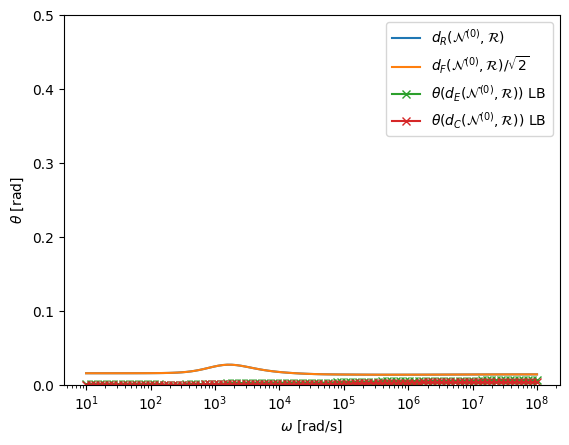

In [41]:
Frequencies=N0RResults["Frequencies"]
MinAnglestoreN0R=N0RResults["MinAnglestoreN0R"]
AnglestoreN0Rfmeasapprxconstsortedmin=np.fmin(N0RResults["AnglestoreN0Rfmeasapprxconstsortedmaxdiff_min"],N0RResults["AnglestoreN0Rfmeasapprxconstsortedmindiff_min"])
AnglestoreN0Rfmeasapprxconstsortedmax=np.fmax(N0RResults["AnglestoreN0Rfmeasapprxconstsortedmaxdiff_max"],N0RResults["AnglestoreN0Rfmeasapprxconstsortedmindiff_max"])

AnglestoreN0Rcommeasapprxconstsortedmin=np.fmin(N0RResults["AnglestoreN0Rcommeasapprxconstsortedmaxdiff_min"],N0RResults["AnglestoreN0Rcommeasapprxconstsortedmindiff_min"])
AnglestoreN0Rcommeasapprxconstsortedmax=np.fmax(N0RResults["AnglestoreN0Rcommeasapprxconstsortedmaxdiff_max"],N0RResults["AnglestoreN0Rcommeasapprxconstsortedmindiff_max"])


dFMinAnglestoreN0R = N0RResults["dFMinAnglestoreN0R"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0R,label=r'$d_R({\cal N}^{(0)},{\cal R})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0R/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal R})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Rfmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal R}))$ LB')

plt.semilogx(Frequencies,AnglestoreN0Rcommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal R}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.5)
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0R_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")


plt.show()

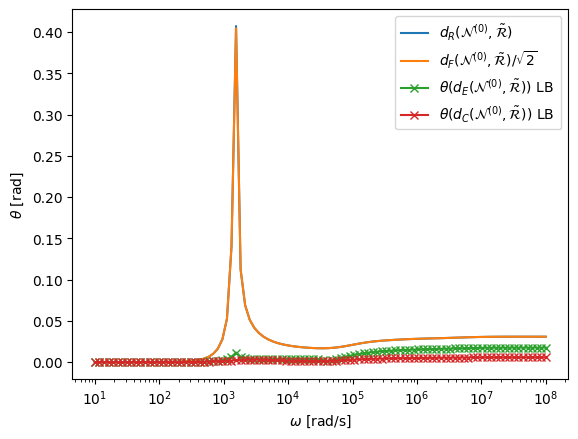

In [42]:
Frequencies=N0RtildeResults["Frequencies"]
MinAnglestoreN0Rtilde=N0RtildeResults["MinAnglestoreN0Rtilde"]
AnglestoreN0Rtildefmeasapprxconstsortedmin=np.fmin(N0RtildeResults["AnglestoreN0Rtildefmeasapprxconstsortedmaxdiff_min"],N0RtildeResults["AnglestoreN0Rtildefmeasapprxconstsortedmindiff_min"])
AnglestoreN0Rtildefmeasapprxconstsortedmax=np.fmax(N0RtildeResults["AnglestoreN0Rtildefmeasapprxconstsortedmaxdiff_max"],N0RtildeResults["AnglestoreN0Rtildefmeasapprxconstsortedmindiff_max"])

AnglestoreN0Rtildecommeasapprxconstsortedmin=np.fmin(N0RtildeResults["AnglestoreN0Rtildecommeasapprxconstsortedmaxdiff_min"],N0RtildeResults["AnglestoreN0Rtildecommeasapprxconstsortedmindiff_min"])
AnglestoreN0Rtildecommeasapprxconstsortedmax=np.fmax(N0RtildeResults["AnglestoreN0Rtildecommeasapprxconstsortedmaxdiff_max"],N0RtildeResults["AnglestoreN0Rtildecommeasapprxconstsortedmindiff_max"])


dFMinAnglestoreN0Rtilde = N0RtildeResults["dFMinAnglestoreN0Rtilde"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0Rtilde,label=r'$d_R({\cal N}^{(0)},\tilde{\cal R})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0Rtilde/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},\tilde{\cal R})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Rtildefmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal N}^{(0)},\tilde{\cal R}))$ LB')

plt.semilogx(Frequencies,AnglestoreN0Rtildecommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal N}^{(0)},\tilde{\cal R}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.5)
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0Rtilde_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")


plt.show()

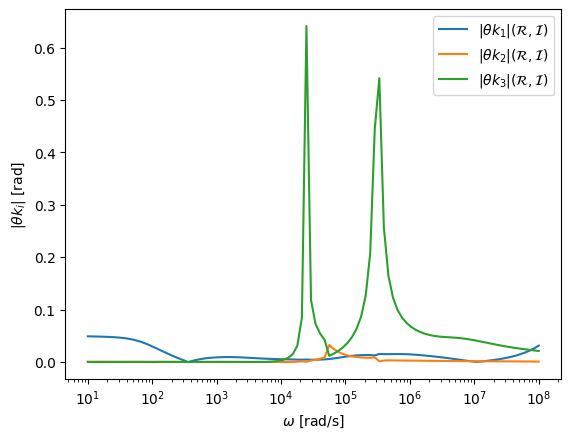

In [8]:
# Plot of vairation of |theta| kvec with omgea
kthetavec = RIResults["RIkthetavec"]
Frequencies=RIResults["Frequencies"]
plt.semilogx(Frequencies,abs(kthetavec[:,0]),label=r'$|\theta  k_1 | ({\cal R},{\cal I}) $')
plt.semilogx(Frequencies,abs(kthetavec[:,1]),label=r'$|\theta  k_2 | ({\cal R},{\cal I})$')
plt.semilogx(Frequencies,abs(kthetavec[:,2]),label=r'$|\theta k_3 | ({\cal R},{\cal I})$')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$|\theta k_i| $ [rad]')
plt.legend()

plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RI_kvec_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")

plt.show()

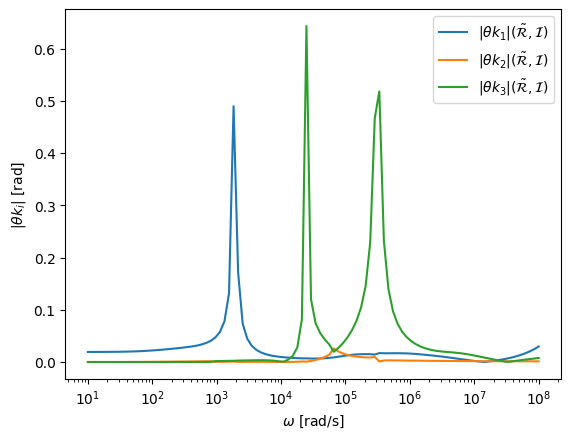

In [9]:
# Plot of vairation of |theta| kvec with omgea
kthetavec = RtildeIResults["RtildeIkthetavec"]
Frequencies=RtildeIResults["Frequencies"]
plt.semilogx(Frequencies,abs(kthetavec[:,0]),label=r'$|\theta  k_1 | (\tilde{\cal R},{\cal I}) $')
plt.semilogx(Frequencies,abs(kthetavec[:,1]),label=r'$|\theta  k_2 | (\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,abs(kthetavec[:,2]),label=r'$|\theta k_3 | (\tilde{\cal R},{\cal I})$')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$|\theta k_i| $ [rad]')
plt.legend()

plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RtildeI_kvec_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")

plt.show()

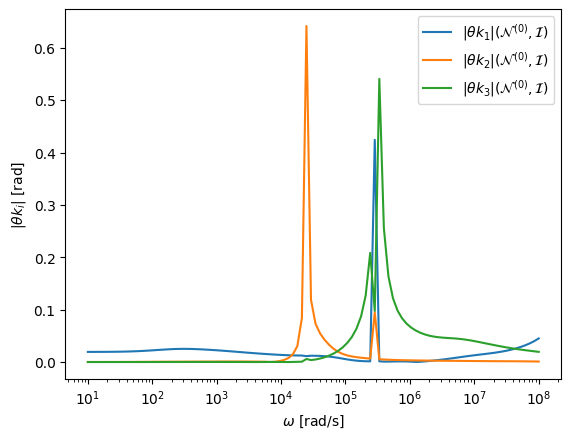

In [10]:
# Plot of vairation of |theta| kvec with omgea
kthetavec = N0IResults["N0Ikthetavec"]
Frequencies=N0IResults["Frequencies"]
plt.semilogx(Frequencies,abs(kthetavec[:,0]),label=r'$|\theta  k_1 | ({\cal N}^{(0)},{\cal I}) $')
plt.semilogx(Frequencies,abs(kthetavec[:,1]),label=r'$|\theta  k_2 | ({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,abs(kthetavec[:,2]),label=r'$|\theta k_3 | ({\cal N}^{(0)},{\cal I})$')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$|\theta k_i| $ [rad]')
plt.legend()

plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0I_kvec_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")

plt.show()

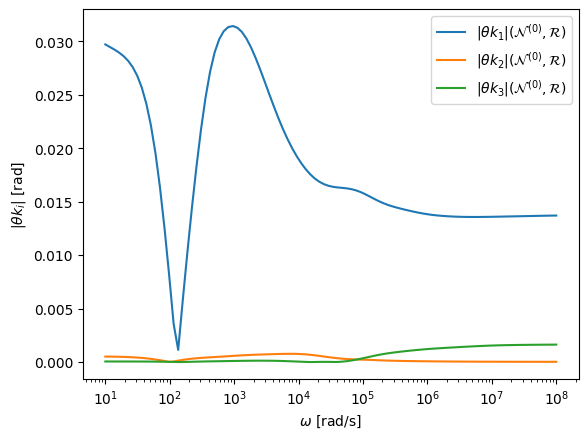

In [11]:
# Plot of vairation of |theta| kvec with omgea
kthetavec = N0RResults["N0Rkthetavec"]
Frequencies=N0RResults["Frequencies"]
plt.semilogx(Frequencies,abs(kthetavec[:,0]),label=r'$|\theta  k_1 | ({\cal N}^{(0)},{\cal R}) $')
plt.semilogx(Frequencies,abs(kthetavec[:,1]),label=r'$|\theta  k_2 | ({\cal N}^{(0)},{\cal R})$')
plt.semilogx(Frequencies,abs(kthetavec[:,2]),label=r'$|\theta k_3 | ({\cal N}^{(0)},{\cal R})$')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$|\theta k_i| $ [rad]')
plt.legend()

plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0R_kvec_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")

plt.show()

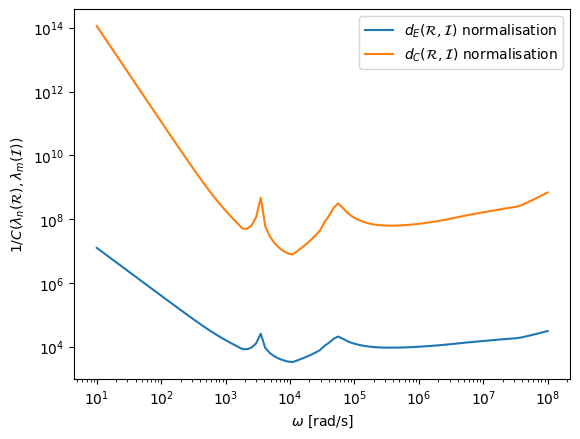

In [43]:
Frequencies=RIResults["Frequencies"]
RIcommeapprx_den_const=np.fmin(RIResults["RIcommeapprx_den_const_max"],RIResults["RIcommeapprx_den_const_min"])
RIfmeasapprx_den_const=np.fmin(RIResults["RIfmeasapprx_den_const_max"],RIResults["RIfmeasapprx_den_const_min"])



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.loglog(Frequencies,1/RIfmeasapprx_den_const,label=r'$d_E({\cal R},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/RIcommeapprx_den_const,label=r'$d_C({\cal R},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n({\cal R}),\lambda_m({\cal I}))$')
plt.legend()
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RI_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

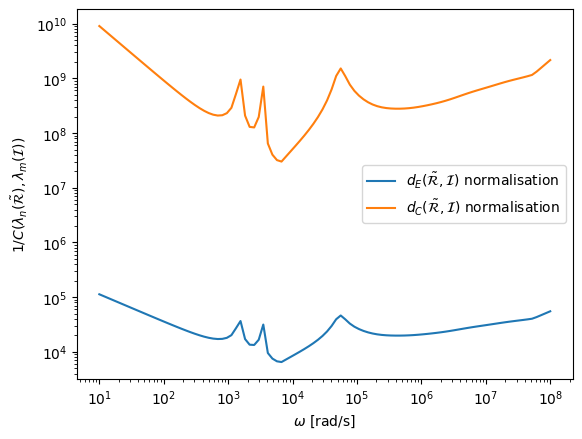

In [44]:
Frequencies=RtildeIResults["Frequencies"]
RtildeIcommeapprx_den_const=np.fmin(RtildeIResults["RtildeIcommeapprx_den_const_max"],RtildeIResults["RtildeIcommeapprx_den_const_min"])
RtildeIfmeasapprx_den_const=np.fmin(RtildeIResults["RtildeIfmeasapprx_den_const_max"],RtildeIResults["RtildeIfmeasapprx_den_const_min"])

fig=plt.figure()
plt.loglog(Frequencies,1/RtildeIfmeasapprx_den_const,label=r'$d_E(\tilde{\cal R},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/RtildeIcommeapprx_den_const,label=r'$d_C(\tilde{\cal R},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n(\tilde{\cal R}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_Rtilde0I_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

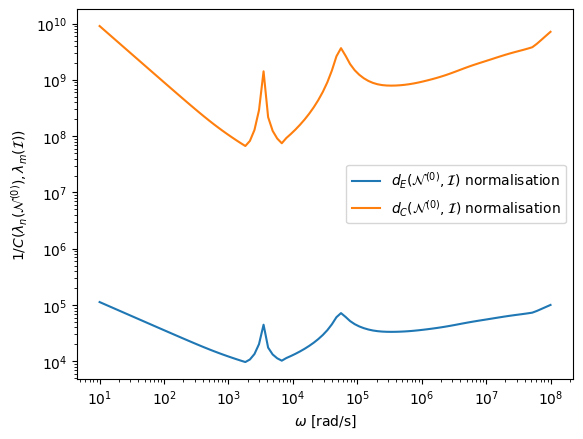

In [46]:
Frequencies=RIResults["Frequencies"]
N0Icommeapprx_den_const=np.fmin(N0IResults["N0Icommeapprx_den_const_max"],N0IResults["N0Icommeapprx_den_const_min"])
N0Ifmeasapprx_den_const=np.fmin(N0IResults["N0Ifmeasapprx_den_const_max"],N0IResults["N0Ifmeasapprx_den_const_min"])

fig=plt.figure()
plt.loglog(Frequencies,1/N0Ifmeasapprx_den_const,label=r'$d_E({\cal N}^{(0)},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/N0Icommeapprx_den_const,label=r'$d_C({\cal N}^{(0)},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n({\cal N}^{(0)}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0I_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()